# Investigation
We will be investigating what variables will have the most impact on a house's market price.  We will be investigating from the perspective of a start up company which buys inexpensive houses and "flips" them for profit.

## Objectives:

* Find what aspects of a house have a significant impact on its value
* Which is a better predictor of price: Condition or Grade?
* Find the areas that are more profitable to sell homes. 

# Importing Clean Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('csv_files/new_kc_house_data_clean_with_dummies2.csv')
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [3]:
print(df.shape)
df.head(3)

(21420, 44)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grd_12_to_13,jan_mar,apr_jun,jul_sep,oct_dec,cond_poor,cond_fair,cond_average,cond_good,cond_very_good
0,221900.0,3,1.00,1180,5650,1180,55,66,47.5112,-122.257,...,0,0,0,0,1,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2170,51,55,47.7210,-122.319,...,0,0,0,0,1,0,0,1,0,0
2,180000.0,2,1.00,770,10000,770,33,16,47.7379,-122.233,...,0,1,0,0,0,0,0,1,0,0


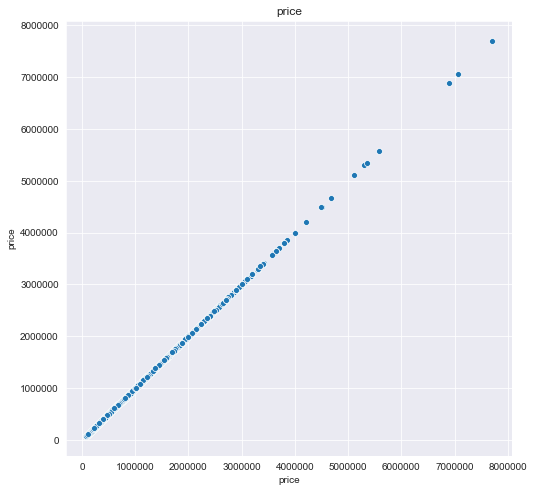

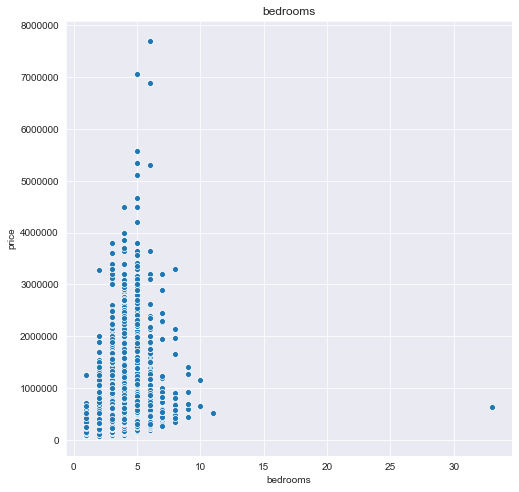

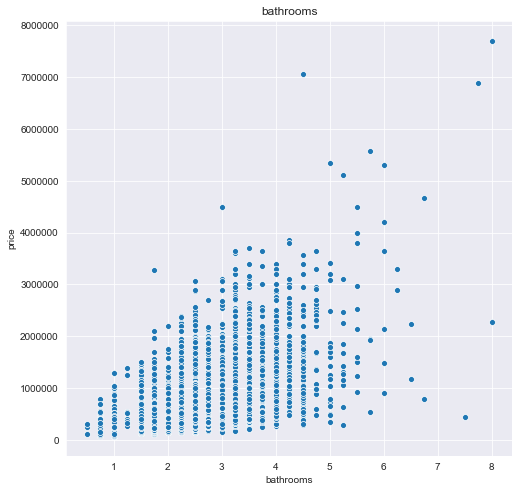

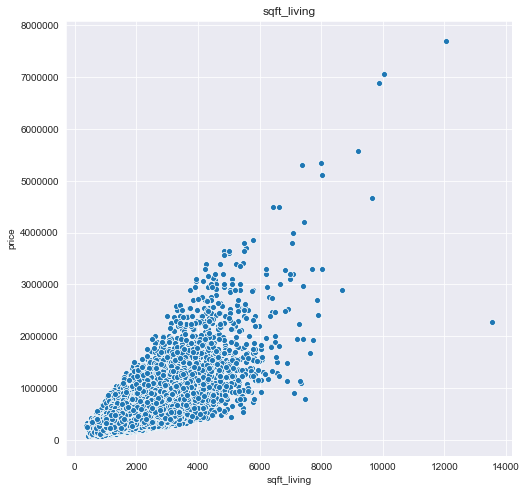

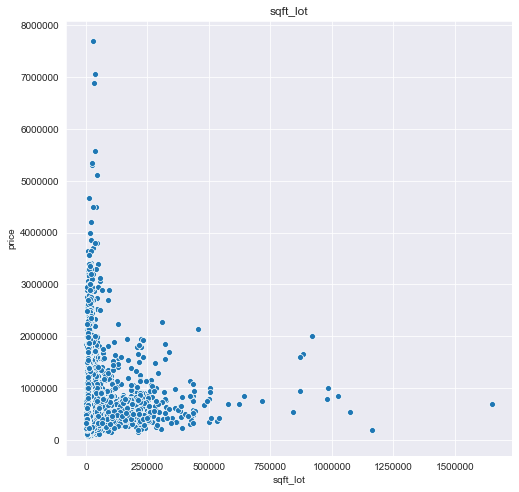

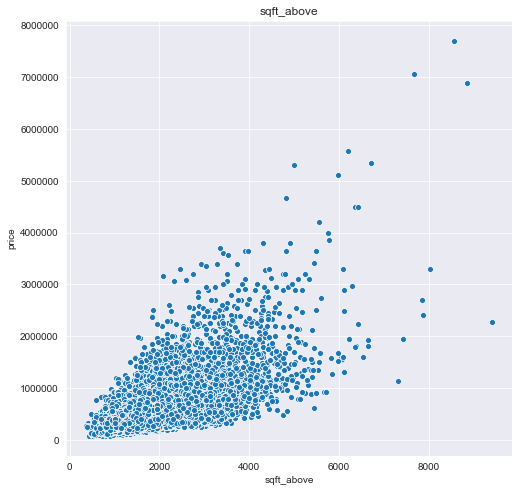

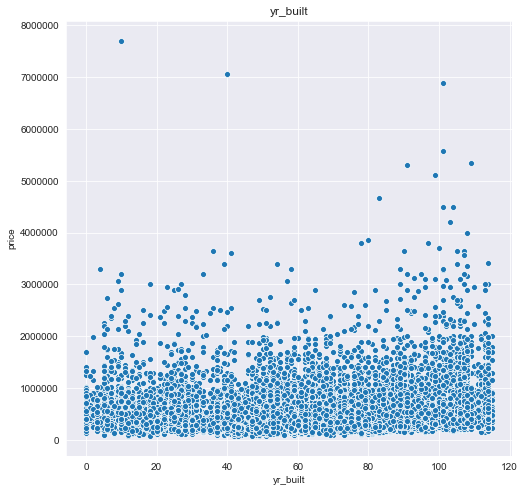

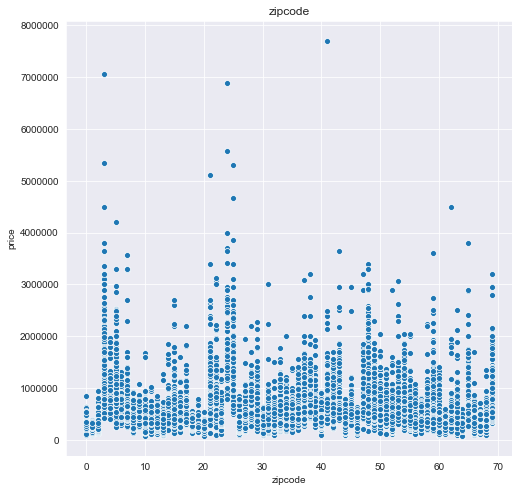

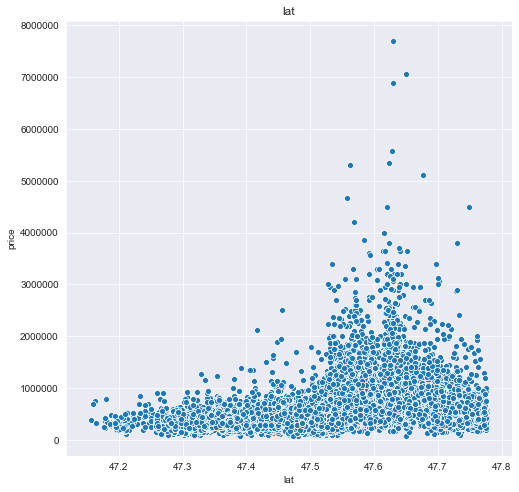

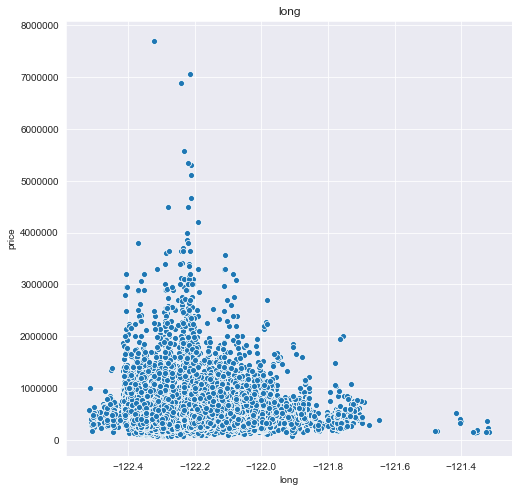

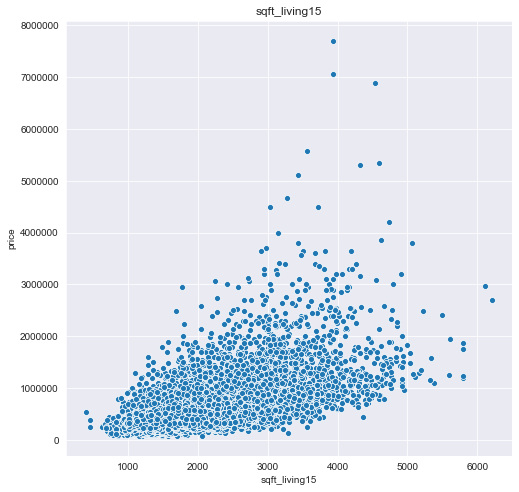

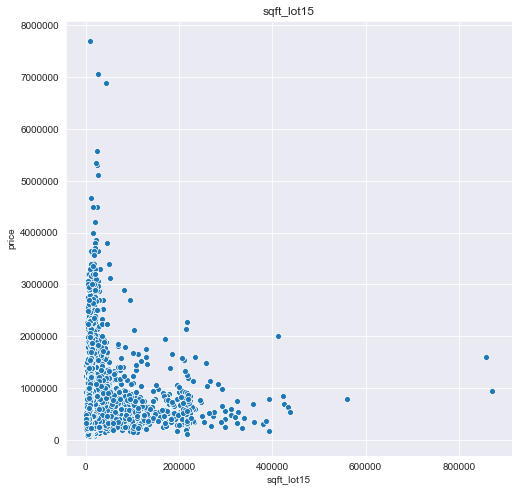

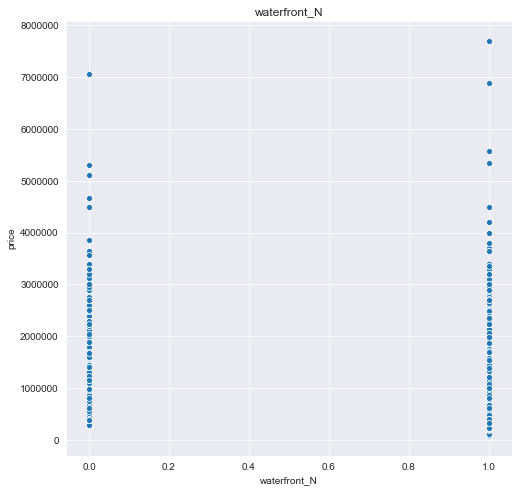

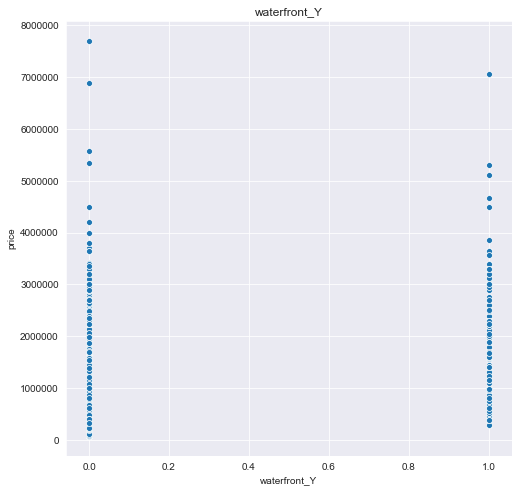

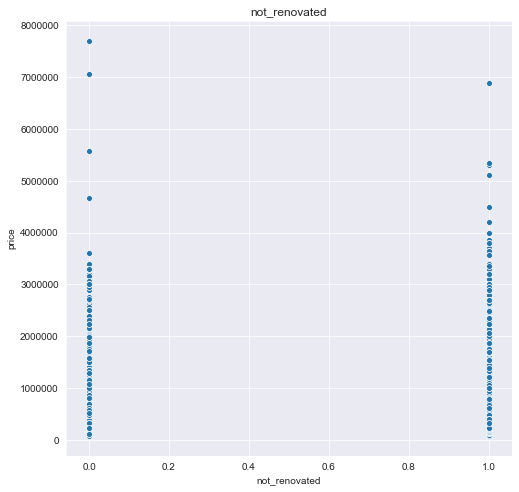

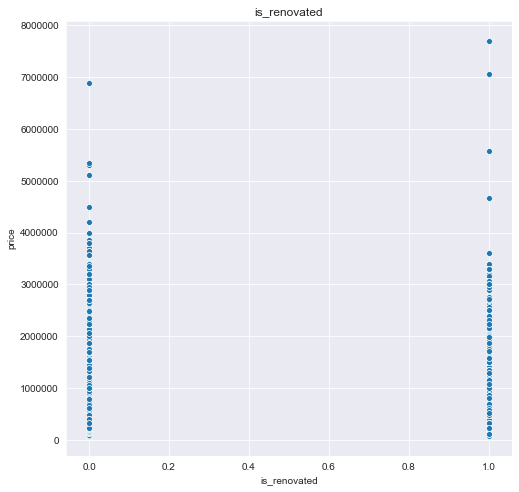

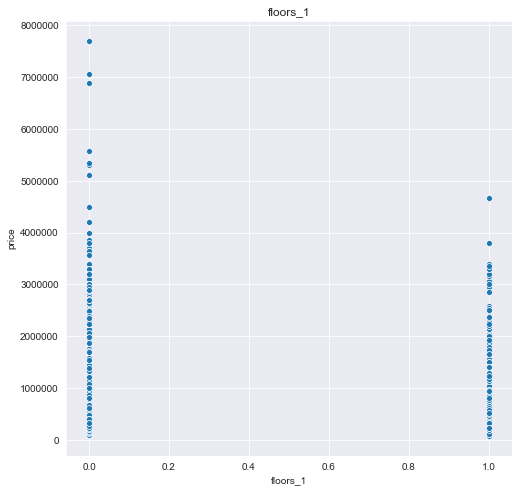

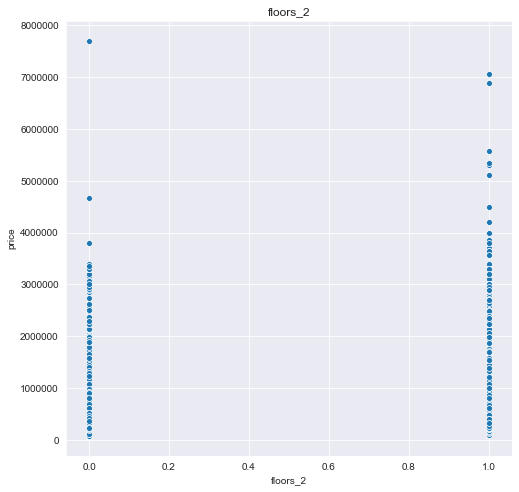

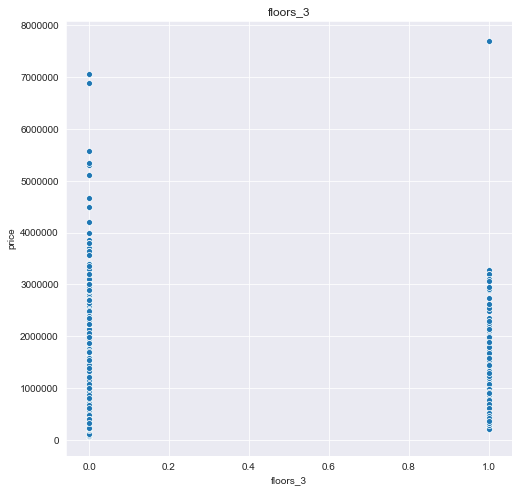

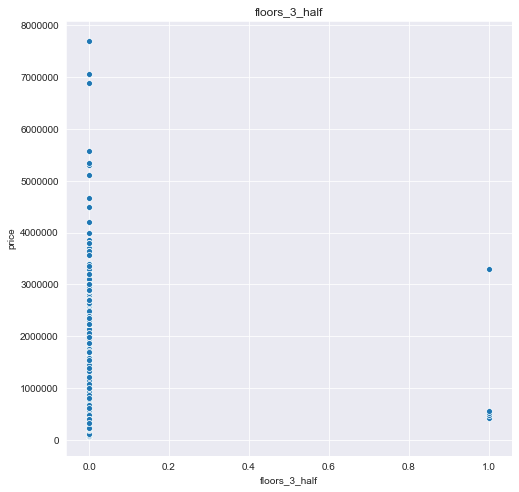

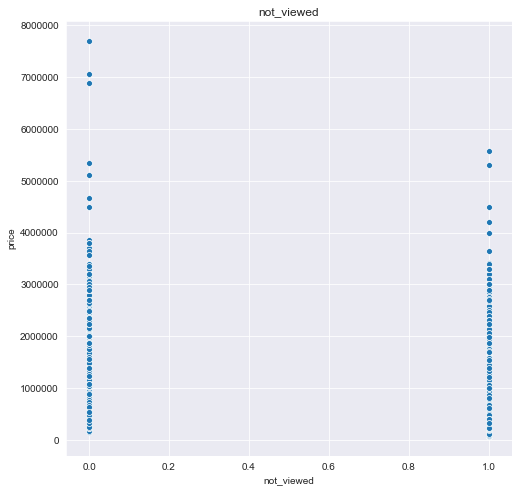

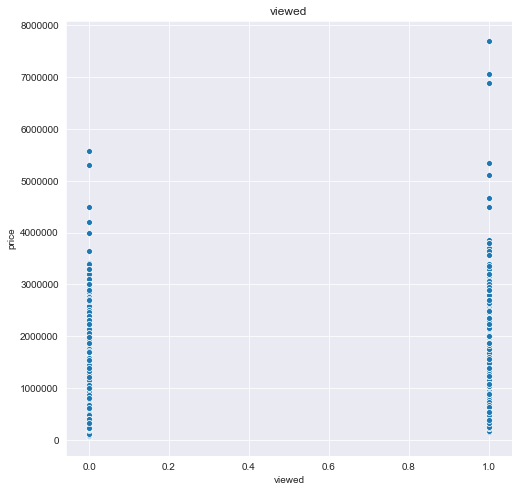

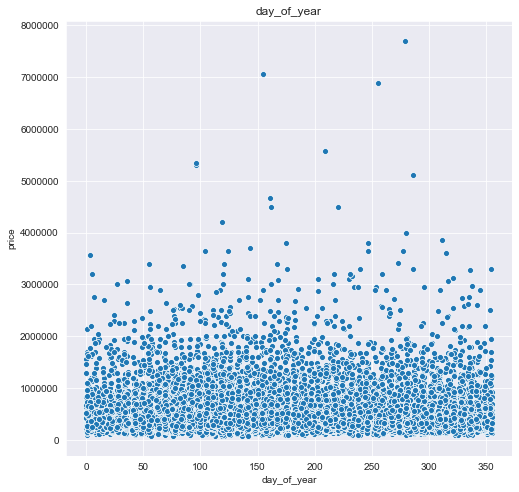

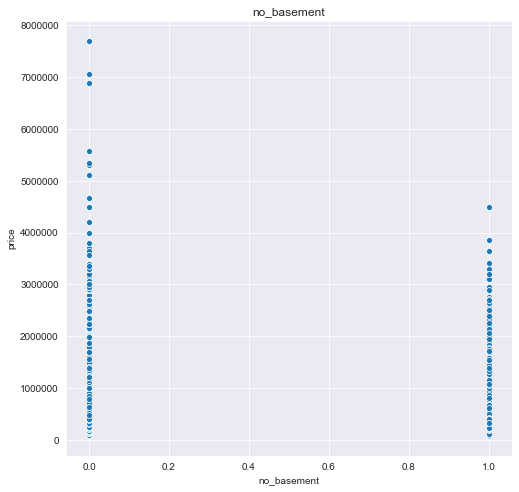

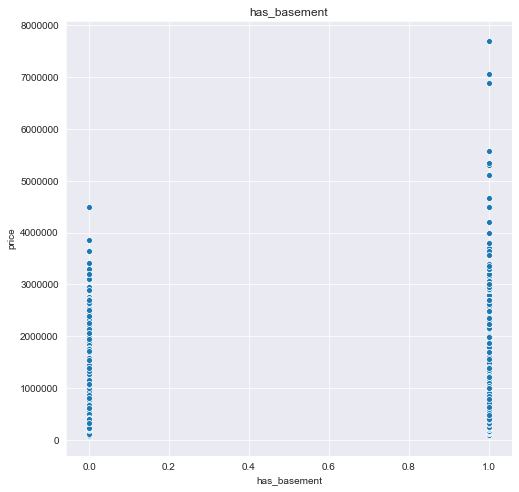

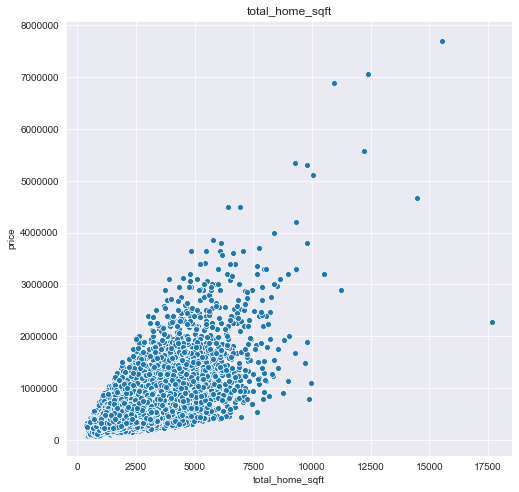

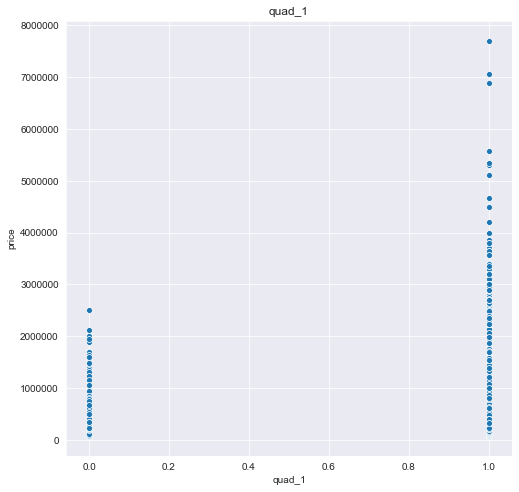

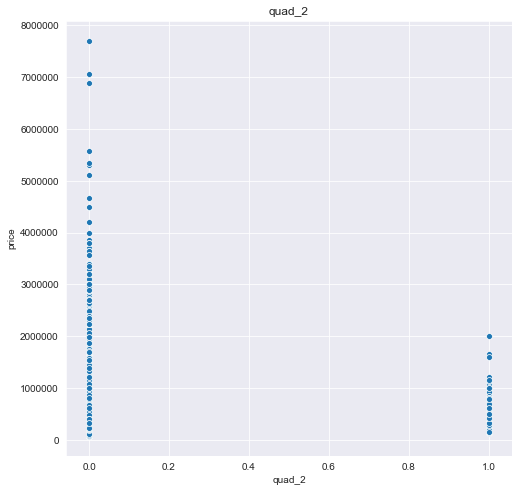

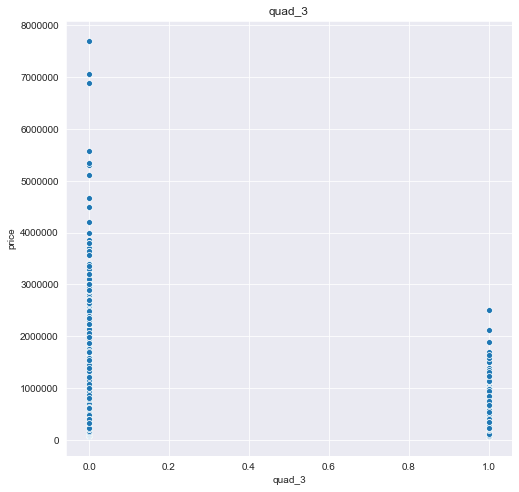

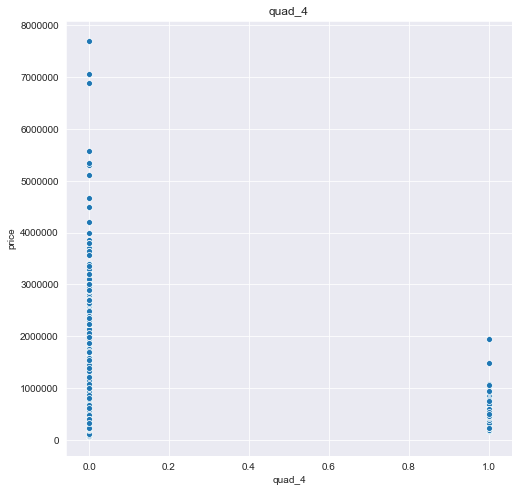

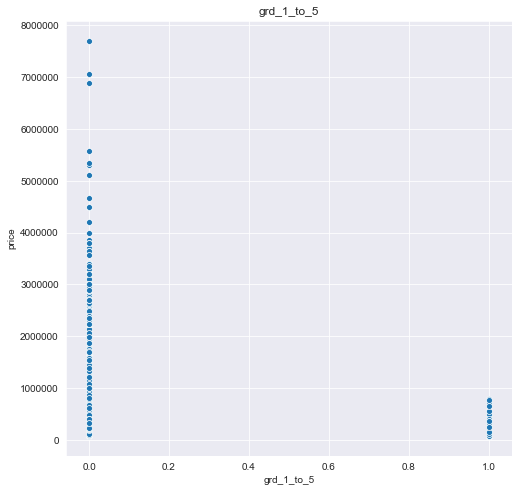

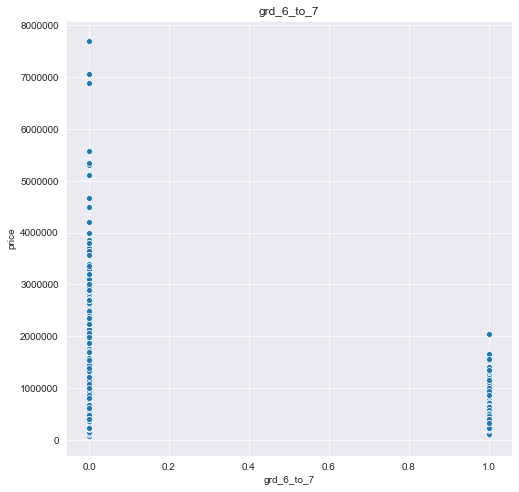

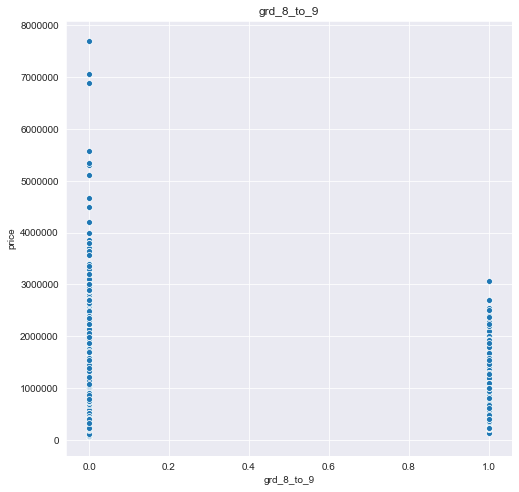

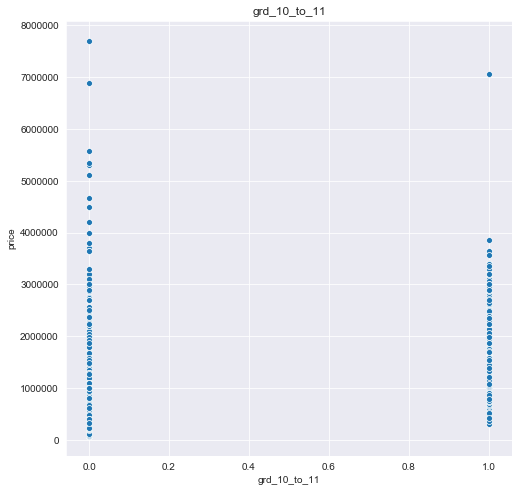

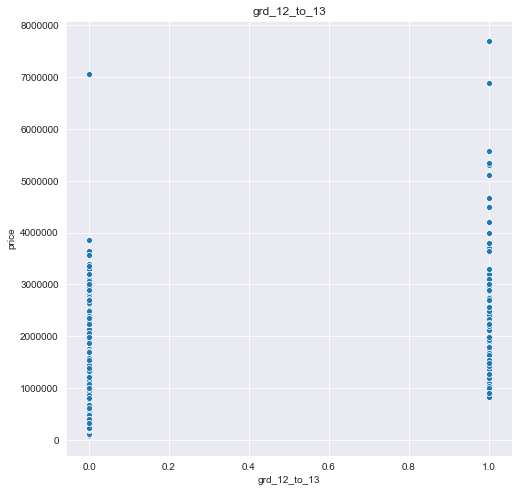

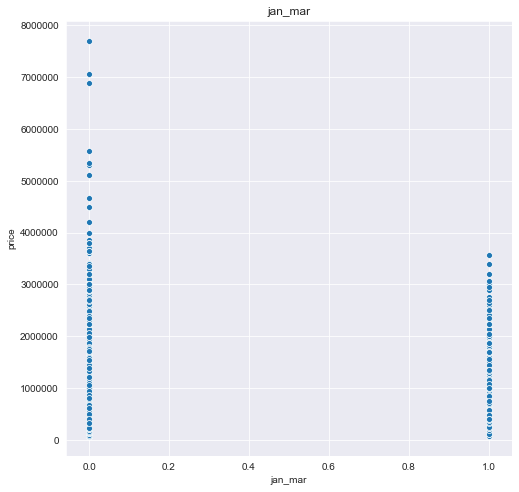

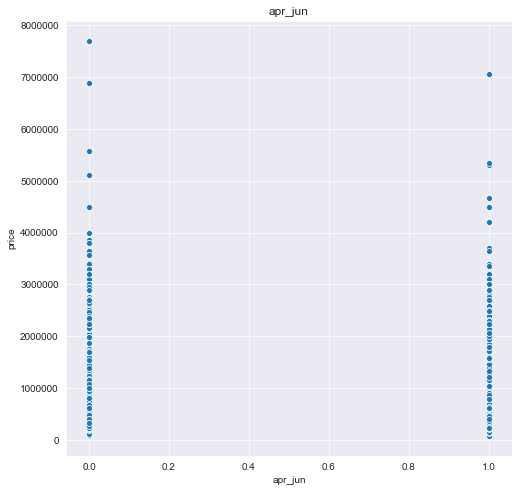

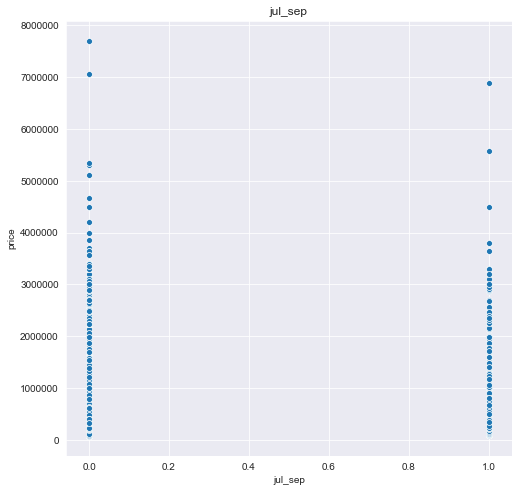

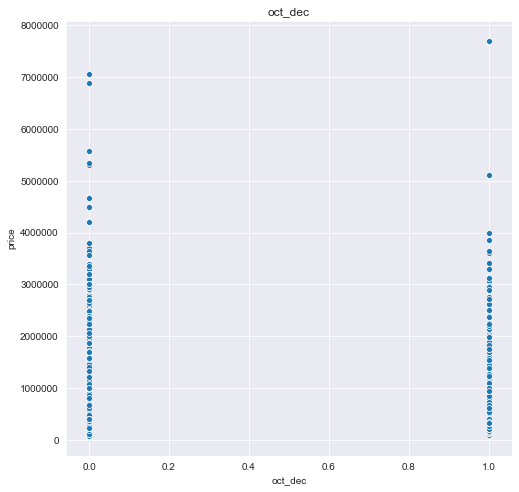

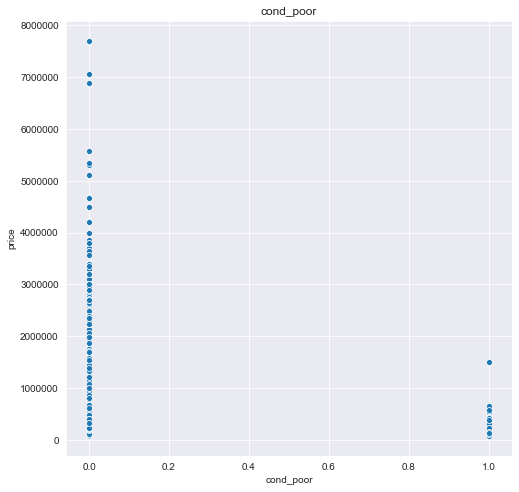

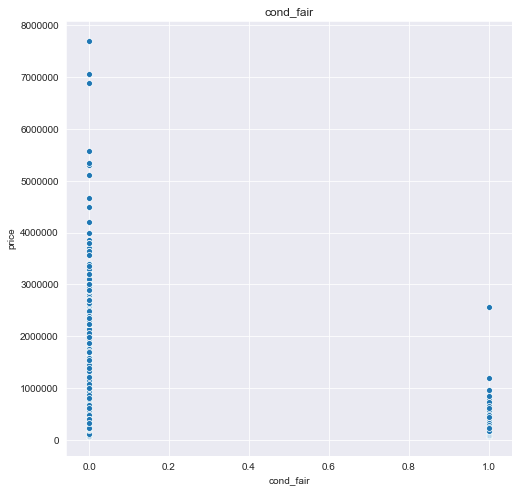

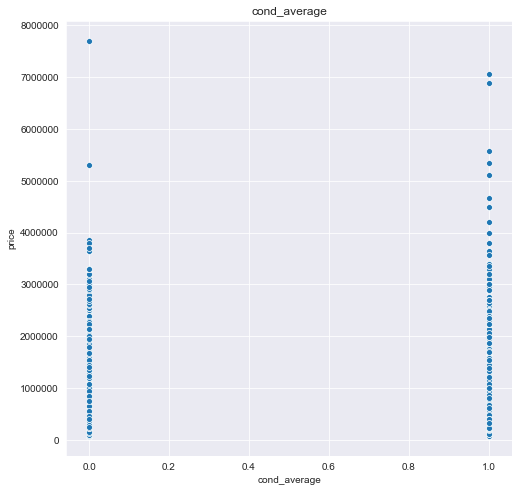

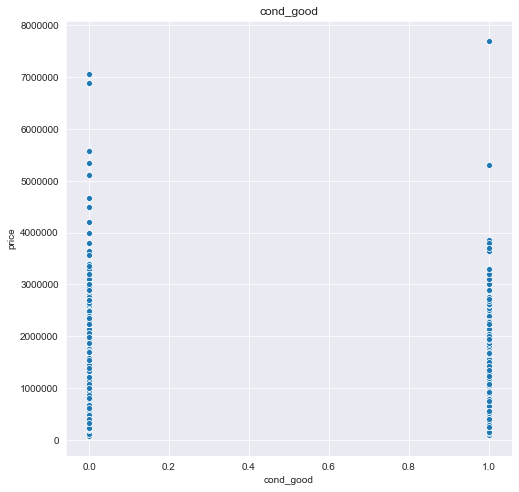

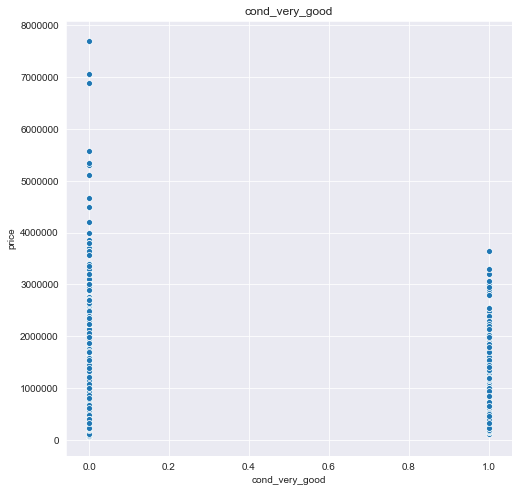

In [15]:
# Note: I first used a joint plot, but since we'll be looking at what I found 
# through the joint plot again, I thought I would save time and rewrite this 
# as a scatter plot.

# Checking the relationship between each feature to the target: Price
for col in df.columns: 
    plt.figure(figsize=(8,8))
    sns.scatterplot(x= col, y= 'price', data=df)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

## Quick Notes:
* **Bedrooms** has a positive relationship to price until you get above 5 bedrooms, then you start to see diminishing returns

* The number of **bathrooms** seems to have a **positive effect** on price

* **Sqft_living** has a **positive** effect, while **sqft_lot** does **not**

* An increase in the King County **grading** system will see an **increase** in price

* You see the most increase in price between **one floor** homes and homes with **two floors**

* Aside from outliers, the following have next to **no effect** of price:

* The data in **zipcode** is too noisy to discern any relationship to price, which is strange considering the interaction we see between **latitude** and **longitude**
 

# Seasonality

In [6]:
# checking for any possible market trends between price and season

seasonality = df[['price','jan_mar','apr_jun','jul_sep','oct_dec', 'day_of_year']]
seasonality.head()

,price,jan_mar,apr_jun,jul_sep,oct_dec,day_of_year
0,221900.0,0,0,0,1,279
1,538000.0,0,0,0,1,335
2,180000.0,1,0,0,0,49
3,604000.0,0,0,0,1,335
4,510000.0,1,0,0,0,42


<Figure size 576x576 with 0 Axes>

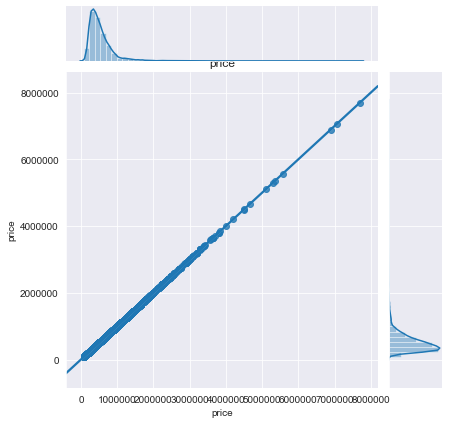

<Figure size 576x576 with 0 Axes>

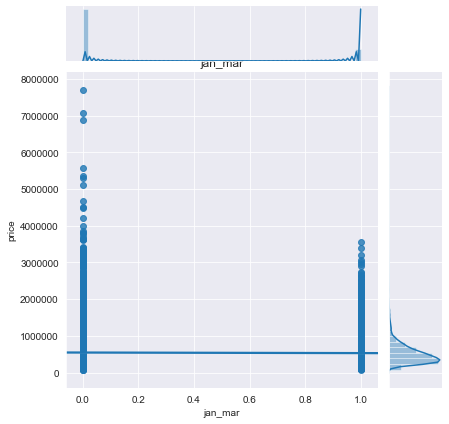

<Figure size 576x576 with 0 Axes>

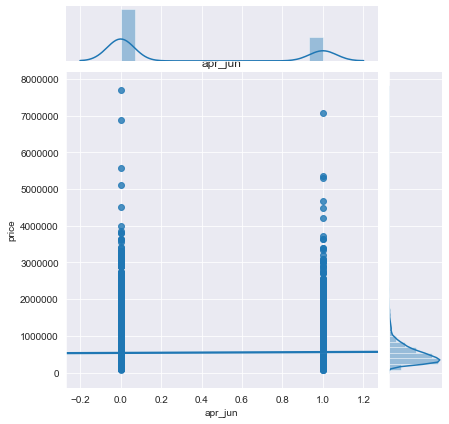

<Figure size 576x576 with 0 Axes>

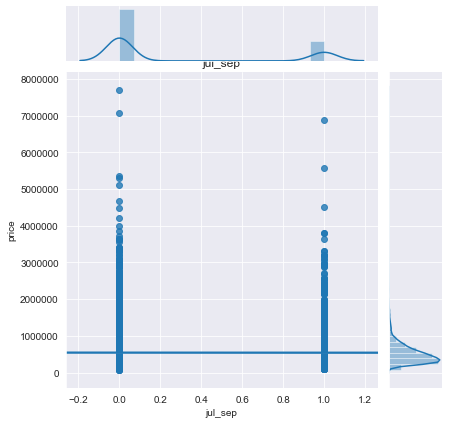

<Figure size 576x576 with 0 Axes>

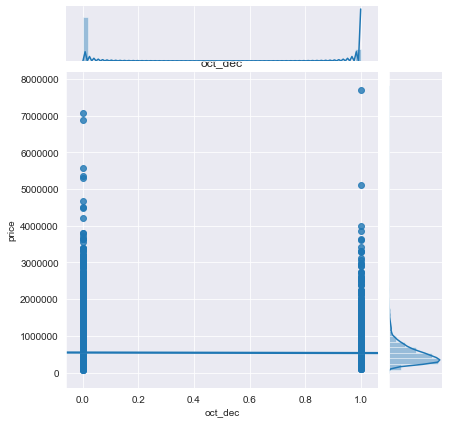

<Figure size 576x576 with 0 Axes>

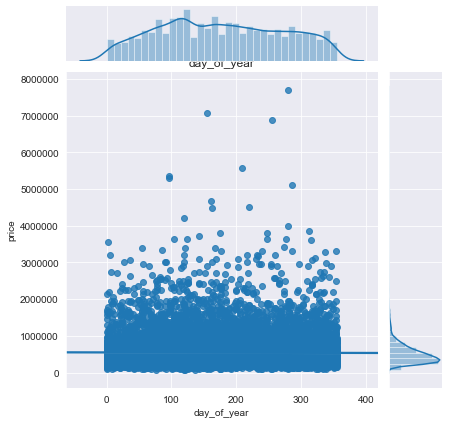

In [16]:
for col in seasonality.columns: 
    plt.figure(figsize=(8,8))
    sns.jointplot(x= col, y='price', data=seasonality, kind='reg')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

Seasons and time of year appear to have **no impact on price**. This **does not** mean that individual home prices don't fluctuate during different times of the year.  This only means that you can find a home at **any price** during **any season**. This also implies that there is **no market major market practice** in which a **majority** of homes will **raise or lower** house prices **based on the time of year**. 

## Viewed vs. Not Viewed

Before we move on to stakeholder questions, I want to look into the relationship between a home being **viewed** and its **price**.

In [17]:
views = df[['price', 'viewed']]
views.head()

,price,viewed
0,221900.0,0
1,538000.0,0
2,180000.0,0
3,604000.0,0
4,510000.0,0


<Figure size 576x576 with 0 Axes>

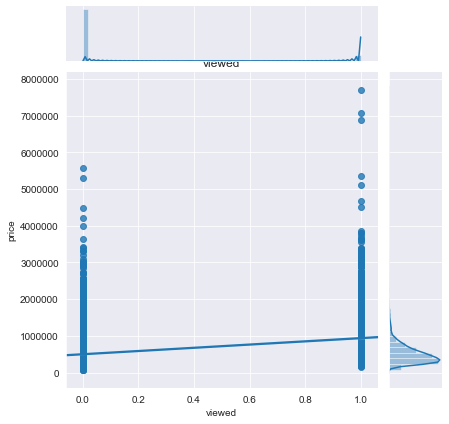

In [18]:
#checking relationship via joint plot

plt.figure(figsize=(8,8))
sns.jointplot(x= 'viewed', y='price', data=views, kind='reg')
plt.xlabel('viewed')
plt.ylabel('price')
plt.title('viewed')
plt.show()

Interesting note is that a home being **viewed** seems to have a **positive** effect on price.  This is most likely due caused by people walking through homes that are out of their price range, as whether or not a home has had an "open house" event **cannot** truly add to its value.  **Conclusion**: The **more expensive** a home is, the **more likely** it is to be **viewed**.

# Questions

## What single aspect of a house has the greatest impact on its value?

Text(0.5, 1.0, 'Grade : Price')

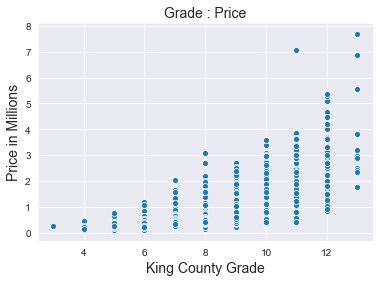

In [51]:
qdf = pd.read_csv('csv_files/kc_house_data.csv')

grade = qdf[['price','grade']]

sns.scatterplot('grade',grade['price']/1000000, data=grade)
plt.xlabel('King County Grade', fontsize=14)
plt.ylabel('Price in Millions', fontsize=14)
plt.title('Grade : Price', fontsize=14)

Text(0.5, 1.0, 'Grade : Price')

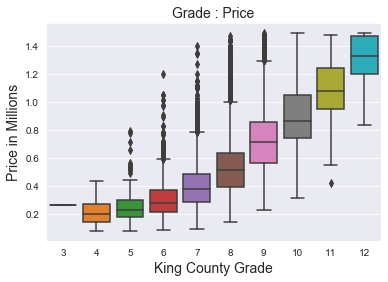

In [52]:
qdf = pd.read_csv('csv_files/kc_house_data.csv')

grade = qdf[['price','grade']]

grade = grade[grade['price'] < 1500000]

sns.boxplot('grade',grade['price']/1000000, data=grade)
plt.xlabel('King County Grade', fontsize=14)
plt.ylabel('Price in Millions', fontsize=14)
plt.title('Grade : Price', fontsize=14)

When you take the raw data that we used to make our dummy variables for the King County Grading System, we get the above plot.

As you can see there is a **strong relationship** between the **grade** the home received from the county and the **sale price**.  Further research suggests that a home changing from a from a grade of 9 to 10 will see a **significant change** in price (see **section 14.1.1** of the "Grunt Work" notebook for a details).  So while setting a goal to flip a low quality home and raising its grade to a 13 (the maximum according to info.kingcounty.gov) might seem tempting, it will be more economical to **buy a midrange home** and polish it up.

### Recommendation:
Ideally, try to purchase a home that has a grade of 9 and improve the grade to 10.  This will give you the greatest gross revenue.  You may want to investigate the costs incurred when improving a home's grade. 

## Which is a better predictor of price: Condition or Grade?

Text(0.5, 1.0, 'Grade : Price')

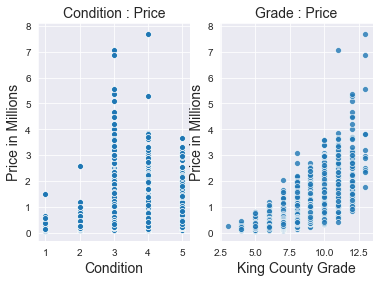

In [32]:
cond = qdf[['price', 'condition']]

axes1 = plt.subplot(121)
sns.scatterplot('condition',cond['price']/1000000, data=cond)
plt.ylabel('Price in Millions', fontsize=14)
plt.xlabel('Condition', fontsize=14)
plt.title('Condition : Price', fontsize=14)

axes2= plt.subplot(122)

sns.scatterplot('grade',grade['price']/1000000, data=grade, alpha=0.8)
plt.xlabel('King County Grade', fontsize=14)
plt.ylabel('Price in Millions', fontsize=14)
plt.title('Grade : Price', fontsize=14)

We can see from the comparing the two evaluation systems side by side, we can see that Grade is a better predictor of price.  The **model also reinforces this idea** showing that a home's **condition has very little effect** on the home's price when compared to its grade.

Similar to grade, a change in condition can eventually lead to diminishing returns. So the question is: **What is a good starting condition to purchase the home?**

Text(0.5, 1.0, 'Condition : Price')

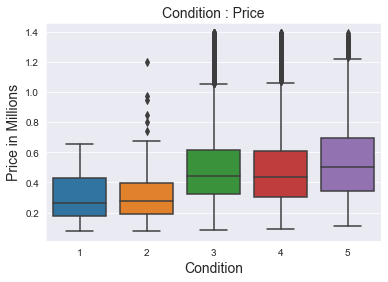

In [34]:
cond = cond[cond['price'] < 1400000]

sns.boxplot('condition',cond['price']/1000000, data=cond)
plt.ylabel('Price in Millions', fontsize=14)
plt.xlabel('Condition', fontsize=14)
plt.title('Condition : Price', fontsize=14)

In the above plot, we see that the greatest increase in price when condition improves from Fair/Badly worn to an Average condition.  Going higher could incur greater costs.

### Recommendation:
Purchase a home that is in **fair condition** and with as **high a grade** as you can afford.

## Where should I look for a home to flip?

To answer this question, we're going to look at a few different maps that explore how homes are distributed throughout the county by **price**, **grade**, and **condition**.  We'll cross reference these maps to find any hot spots that meet the criteria we've established.

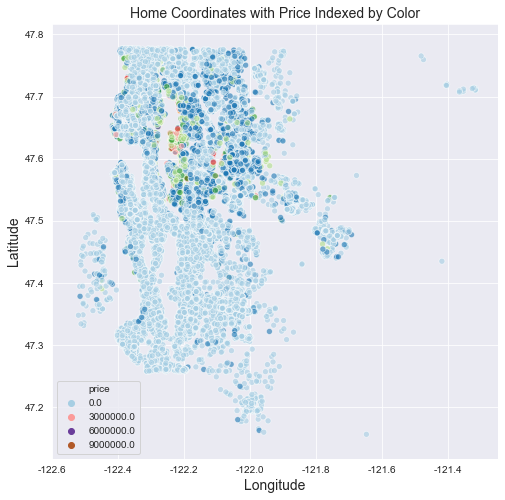

In [36]:
long = qdf['long']
lat = qdf['lat']
plt.figure(figsize=(8,8))

sns.scatterplot(x=long, y=lat, hue='price', data=qdf, palette='Paired',
               alpha=.6)

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
xticks = [-122.6, -122.4, -122.2, -122.0, -121.8, -121.6, -121.4 ]
yticks = [47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8]
plt.xticks(ticks=xticks, labels=xticks)
plt.yticks(ticks=yticks, labels=yticks)

plt.title('Home Coordinates with Price Indexed by Color',fontsize=14)
plt.legend(fancybox=True)

This gives us a good outline of the King County area. Prices of homes **increase** as you head **north-northwest**.  This makes sense because this is where you get into the get into the Bellevue, Kirkland, and Redmond Area. This makes sense as is where you see a of waterfront property. 

House prices **drop** as you head **south-southwest** . It's a bit suspicious to see so many home's that the map's legend claims have a price of "0". Let's filtered out every value above 140,000.

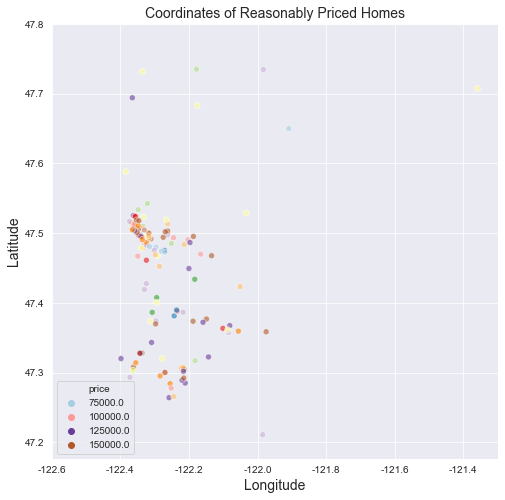

In [42]:
reasonable = qdf[qdf['price'] < 140000]
long = reasonable['long']
lat = reasonable['lat']
plt.figure(figsize=(8,8))

sns.scatterplot(x=long, y=lat, hue='price', data=reasonable, palette='Paired',
               alpha=.6)

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
xticks = [-122.6, -122.4, -122.2, -122.0, -121.8, -121.6, -121.4 ]
yticks = [47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8]
plt.xticks(ticks=xticks, labels=xticks)
plt.yticks(ticks=yticks, labels=yticks)

plt.title('Coordinates of Reasonably Priced Homes',fontsize=14)
plt.legend(fancybox=True)

Ok! This definitely sheds a more accurate light on the situation. Let's zero in on the **cluster** at **latitude 47.5**, **longitude -122.35**.

What **grade** did these homes receive from the county and do they meet our **criteria** (minimum grade of 6)? 

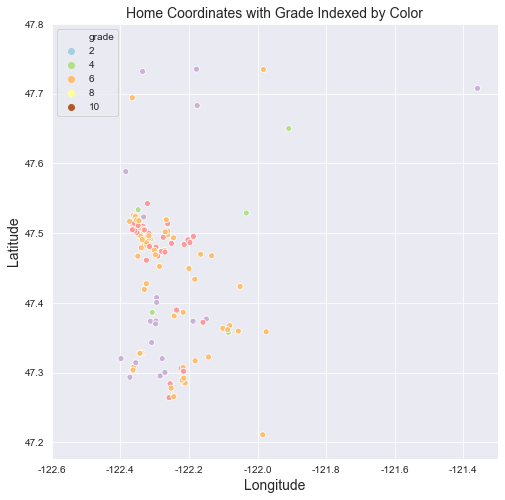

In [44]:
grade = qdf[qdf['grade'] < 10]

plt.figure(figsize=(8,8))
sns.scatterplot(x=long, y=lat, hue=grade['grade'], data=grade, 
                palette='Paired')

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
xticks = [-122.6, -122.4, -122.2, -122.0, -121.8, -121.6, -121.4 ]
yticks = [47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8]
plt.xticks(ticks=xticks, labels=xticks)
plt.yticks(ticks=yticks, labels=yticks)

plt.title('Home Coordinates with Grade Indexed by Color', fontsize=14)
plt.legend(fancybox=True)

If we draw our eye's straight on those **coordinates**, you'll see that there is a healthy range of grades, many of which **meet our minimum of 6**!

Do the **conditions** of the homes meet our **criteria** (Condition rating of 2)?

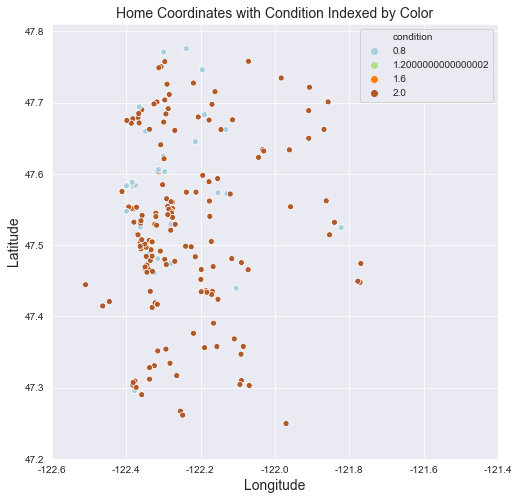

In [45]:
long = qdf['long']
lat = qdf['lat']
condition = qdf[qdf['condition'] < 3]

plt.figure(figsize=(8,8))
sns.scatterplot(x=long, y=lat, hue=condition['condition'], data=condition, 
                palette='Paired')

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
xticks = [-122.6, -122.4, -122.2, -122.0, -121.8, -121.6, -121.4 ]
yticks = [47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8]
plt.xticks(ticks=xticks, labels=xticks)
plt.yticks(ticks=yticks, labels=yticks)

plt.title('Home Coordinates with Condition Indexed by Color', fontsize=14)
plt.legend(fancybox=True)

Again, focusing our attention on lat. 47.5, long. -122.35, our cluster has homes that meet our requirement, having a condition rating of 2!  

Plugging these coordinates into Google Maps and you'll find that your best bet is to look for homes to flip in King County are the in the **Highline**  area of Seattle  and **White Center**.  Homes in these areas, generally, are **lower-priced**, are in **fair condition**, and have a **grade of 6 or more**.

# Recommendation Summary

* You'll want to purchase a home with in that is in **fair condition** and whose **King County grade** is **relatively high**, ideally a 9.

* May want to only invest as much as you need to bump the grade up 1 number.  Largest gross increase comes from jumping from a 9 to a 10.

* Look for a home in the **Seattle, Highline** and **White Center** areas since these homes are lower-priced and you're more likely to find homes that reach the above criteria.

* Lastly, you might consider researching the costs associated with flipping homes that have higher grades. 

# Thank you!